## Importing the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Fetching the current working directory
os.getcwd()

'C:\\Users\\Sahaanah\\Desktop\\Python projects'

In [3]:
#Changing the current directory
os.chdir('C:\\Users\\Sahaanah\\Desktop\\Internship')

In [4]:
os.getcwd()

'C:\\Users\\Sahaanah\\Desktop\\Internship'

## Reading the dataset

In [5]:
df = pd.read_csv('C:\\Users\\Sahaanah\\Desktop\\Internship\\insurance.csv.csv')

In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [8]:
df.shape

(1338, 7)

## Data Pre-processing

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [11]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [12]:
#Cleaning the data
df.drop(["region"], axis = 1, inplace = True)

In [13]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [14]:
#Detecting all the empty values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

In [17]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

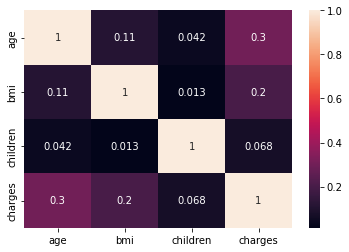

In [18]:
sns.heatmap(df.corr(), annot=True)

C:\Users\Sahaanah\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

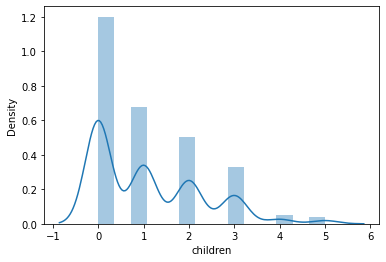

In [19]:
sns.distplot(df["children"])

<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

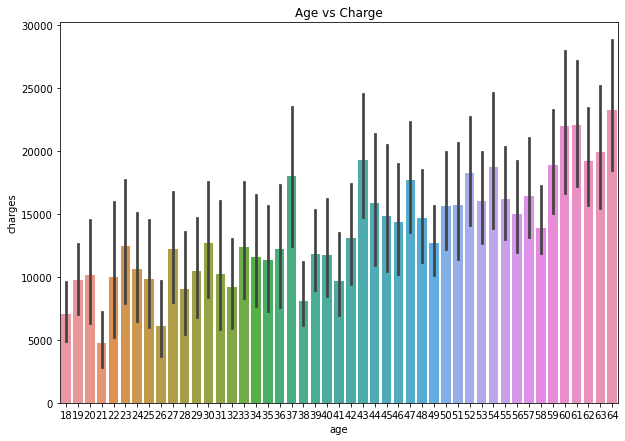

In [20]:
plt.figure(figsize=(10,7))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df)

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

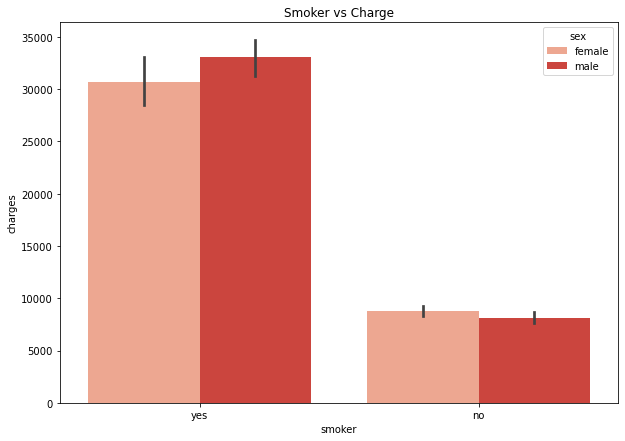

In [21]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Reds',hue='sex')

<AxesSubplot:title={'center':'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

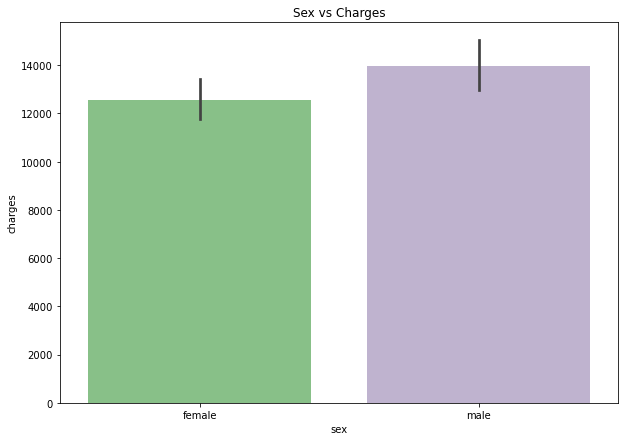

In [22]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Accent')

## Feature Engineering

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
le.fit(df["sex"])

LabelEncoder()

In [25]:
le.transform(df["sex"])

array([0, 1, 1, ..., 0, 0, 0])

In [26]:
cat_cols = ["age", "sex", "bmi","children", "smoker", "charges"]
for cols in cat_cols:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])

In [27]:
df.head()

,age,sex,bmi,children,smoker,charges
0,1,0,197,0,1,1005
1,0,1,350,1,0,57
2,10,1,331,3,0,306
3,15,1,73,0,0,1097
4,14,1,223,0,0,254


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1338 non-null   int64
 1   sex       1338 non-null   int32
 2   bmi       1338 non-null   int64
 3   children  1338 non-null   int64
 4   smoker    1338 non-null   int32
 5   charges   1338 non-null   int64
dtypes: int32(2), int64(4)
memory usage: 52.4 KB


## Splitting the dataset into training and testing sets

In [29]:
X = df.drop(columns='charges',axis=1)
Y = df['charges']

In [30]:
X

,age,sex,bmi,children,smoker
0,1,0,197,0,1
1,0,1,350,1,0
2,10,1,331,3,0
3,15,1,73,0,0
4,14,1,223,0,0
...,...,...,...,...,...
1333,32,1,276,3,0
1334,0,0,302,0,0
1335,0,0,422,0,0
1336,3,0,146,0,0


In [31]:
Y

0       1005
1         57
2        306
3       1097
4        254
        ... 
1333     746
1334     118
1335      32
1336      91
1337    1171
Name: charges, Length: 1338, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 5) (1070, 5) (268, 5)


## Model Training using Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [35]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [36]:
#Model Evaluation

#Prediction on training data
training_data_pred = regressor.predict(X_train)

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
#Calculating R squared value
r2_train = r2_score(Y_train, training_data_pred)
r2_train

0.7473413592593952

In [39]:
#Prediction on test data
test_data_pred = regressor.predict(X_test)

In [40]:
#Calculating R squared value
r2_test = r2_score(Y_test, test_data_pred)
r2_test

0.7939905622235175

## Building a Predictive System

In [41]:
input_data = (14,1,223,0,0)

#Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The insurance cost is Rs", prediction[0])

[374.09302574]
The insurance cost is Rs 374.0930257377104


## Saving the trained model

In [42]:
import pickle

In [52]:
filename = "C:\\Users\\Sahaanah\\Desktop\\Python projects\\trained_model.sav"
pickle.dump(regressor, open(filename, 'wb'))

In [53]:
#Loading the saved model
loaded_model = pickle.load(open("trained_model.sav", 'rb'))

In [54]:
input_data = (14,1,223,0,0)

#Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

print("The insurance cost is Rs", prediction[0])

[374.09302574]
The insurance cost is Rs 374.0930257377104
